<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install feature-engine


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import graphviz
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree
from sklearn.tree import export_graphviz
import joblib
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Retail_Business/employee satisfaction.csv')

In [ ]:
df.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   emp_id            500 non-null    object
 1   age               500 non-null    int64 
 2   Dept              500 non-null    object
 3   location          500 non-null    object
 4   education         500 non-null    object
 5   recruitment_type  500 non-null    object
 6   job_level         500 non-null    int64 
 7   rating            500 non-null    int64 
 8   onsite            500 non-null    int64 
 9   awards            500 non-null    int64 
 10  certifications    500 non-null    int64 
 11  salary            500 non-null    int64 
 12  satisfied         500 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 50.9+ KB


In [ ]:
df.describe()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


In [ ]:
df.isnull().sum()

,0
emp_id,0
age,0
Dept,0
location,0
education,0
recruitment_type,0
job_level,0
rating,0
onsite,0
awards,0


In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
df = df.drop_duplicates()

Number of duplicate rows: 0


In [ ]:
df.drop(['emp_id'], axis=1, inplace=True)

<ipython-input-85-7f487d13db26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='satisfied', palette='Set2')


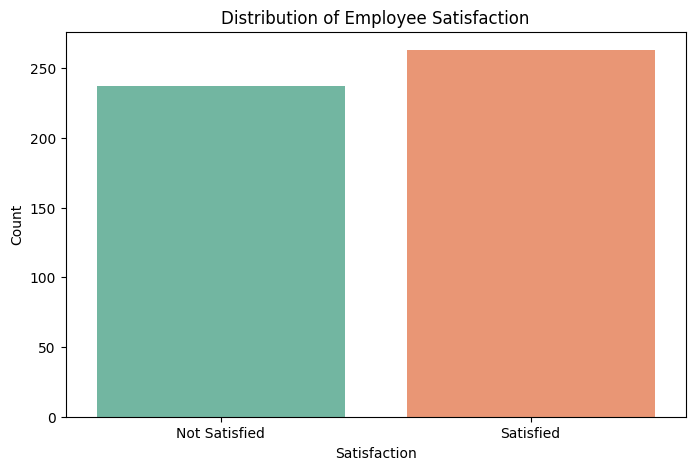

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='satisfied', palette='Set2')
plt.title('Distribution of Employee Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Satisfied', 'Satisfied'])
plt.show()


<ipython-input-86-0216933120b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='satisfied', y='age', data=df, palette='Set2')


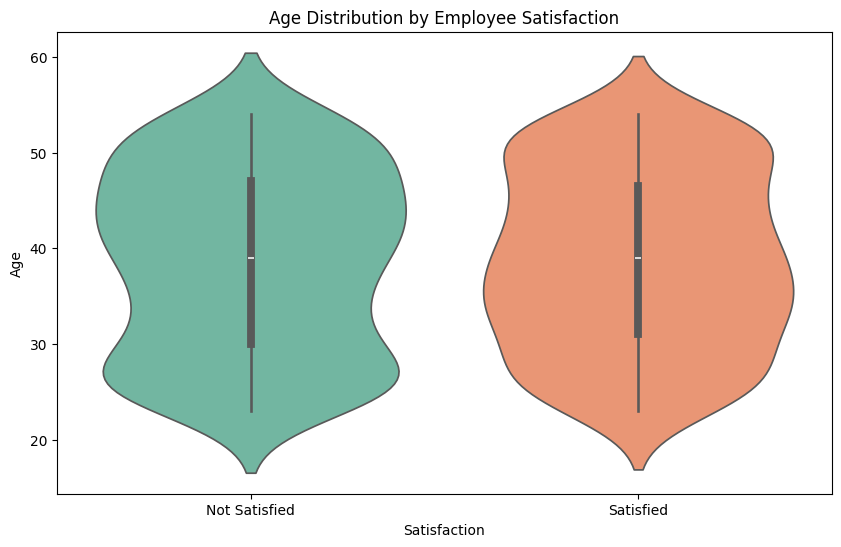

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='satisfied', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Employee Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Not Satisfied', 'Satisfied'])
plt.show()

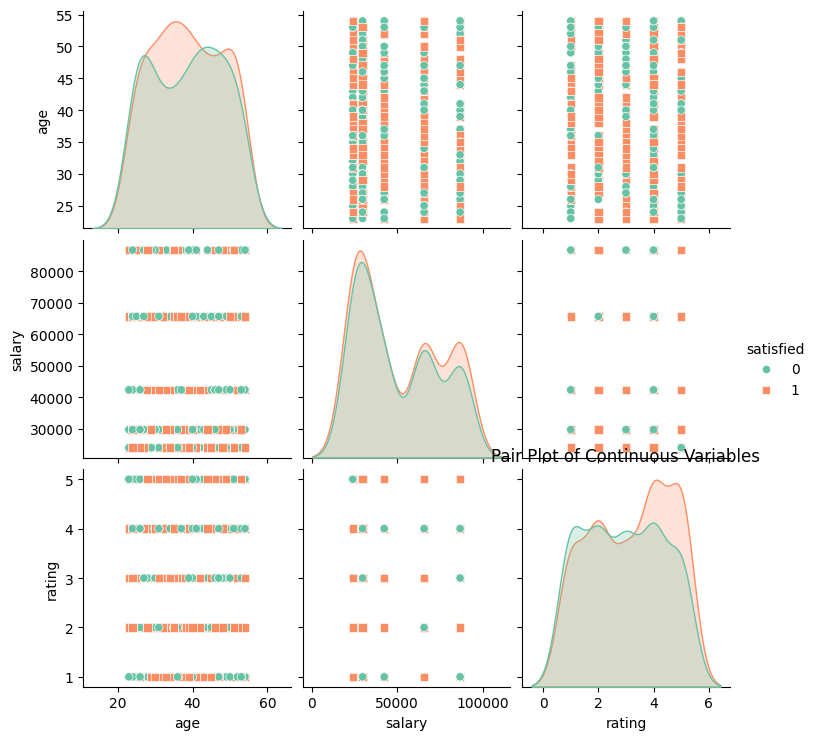

In [ ]:
sns.pairplot(df[['age', 'salary', 'rating', 'satisfied']],
             hue='satisfied', palette='Set2', markers=["o", "s"])
plt.title('Pair Plot of Continuous Variables')
plt.show()


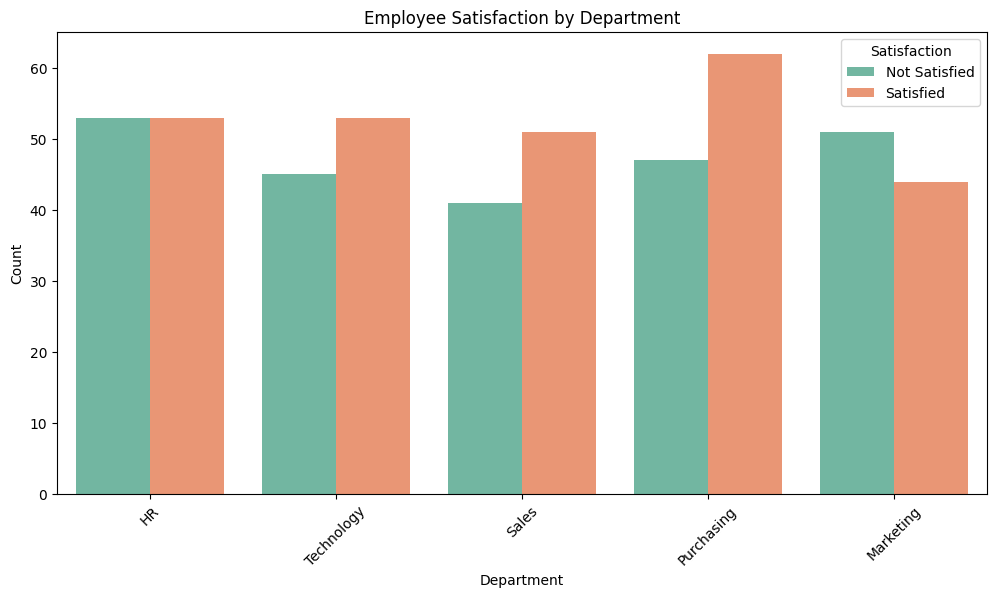

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Dept', hue='satisfied', palette='Set2')
plt.title('Employee Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Satisfaction', loc='upper right', labels=['Not Satisfied', 'Satisfied'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
X = df.drop('satisfied', axis=1)
y = df['satisfied']

In [ ]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Create a pipeline for numeric data: Imputation + Scaling
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

In [ ]:
# Create a pipeline for categorical data: One-Hot Encoding
encoding_pipeline = Pipeline(steps=[a
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [ ]:
preprocess_pipeline = ColumnTransformer(transformers=[
    ('numeric', num_pipeline, numeric_cols),
    ('categorical', encoding_pipeline, categorical_cols)
])

In [ ]:
ise = preprocess_pipeline.fit(X)

joblib.dump(ise, 'ise_pipeline.pkl')

clean_data = pd.DataFrame(ise.transform(X), columns=ise.get_feature_names_out())

clean_data

,numeric__age,numeric__job_level,numeric__rating,numeric__onsite,numeric__awards,numeric__certifications,numeric__salary,categorical__Dept_HR,categorical__Dept_Marketing,categorical__Dept_Purchasing,categorical__Dept_Sales,categorical__Dept_Technology,categorical__location_City,categorical__location_Suburb,categorical__education_PG,categorical__education_UG,categorical__recruitment_type_On-Campus,categorical__recruitment_type_Recruitment Agency,categorical__recruitment_type_Referral,categorical__recruitment_type_Walk-in
0,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.838710,0.25,1.00,0.0,0.666667,0.0,0.091410,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
496,0.032258,0.25,0.75,0.0,0.222222,0.0,0.091410,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
497,0.354839,0.00,0.50,0.0,0.222222,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
498,0.096774,0.25,0.00,1.0,0.111111,1.0,0.091410,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


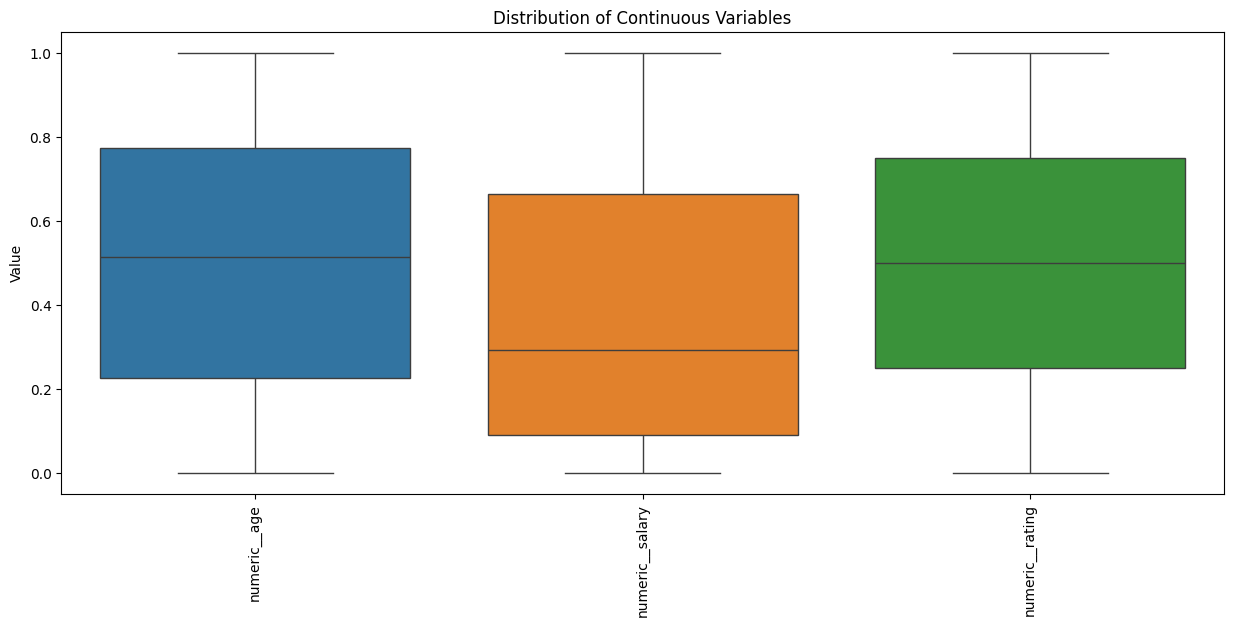

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=clean_data[['numeric__age', 'numeric__salary', 'numeric__rating']])
plt.title('Distribution of Continuous Variables')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()


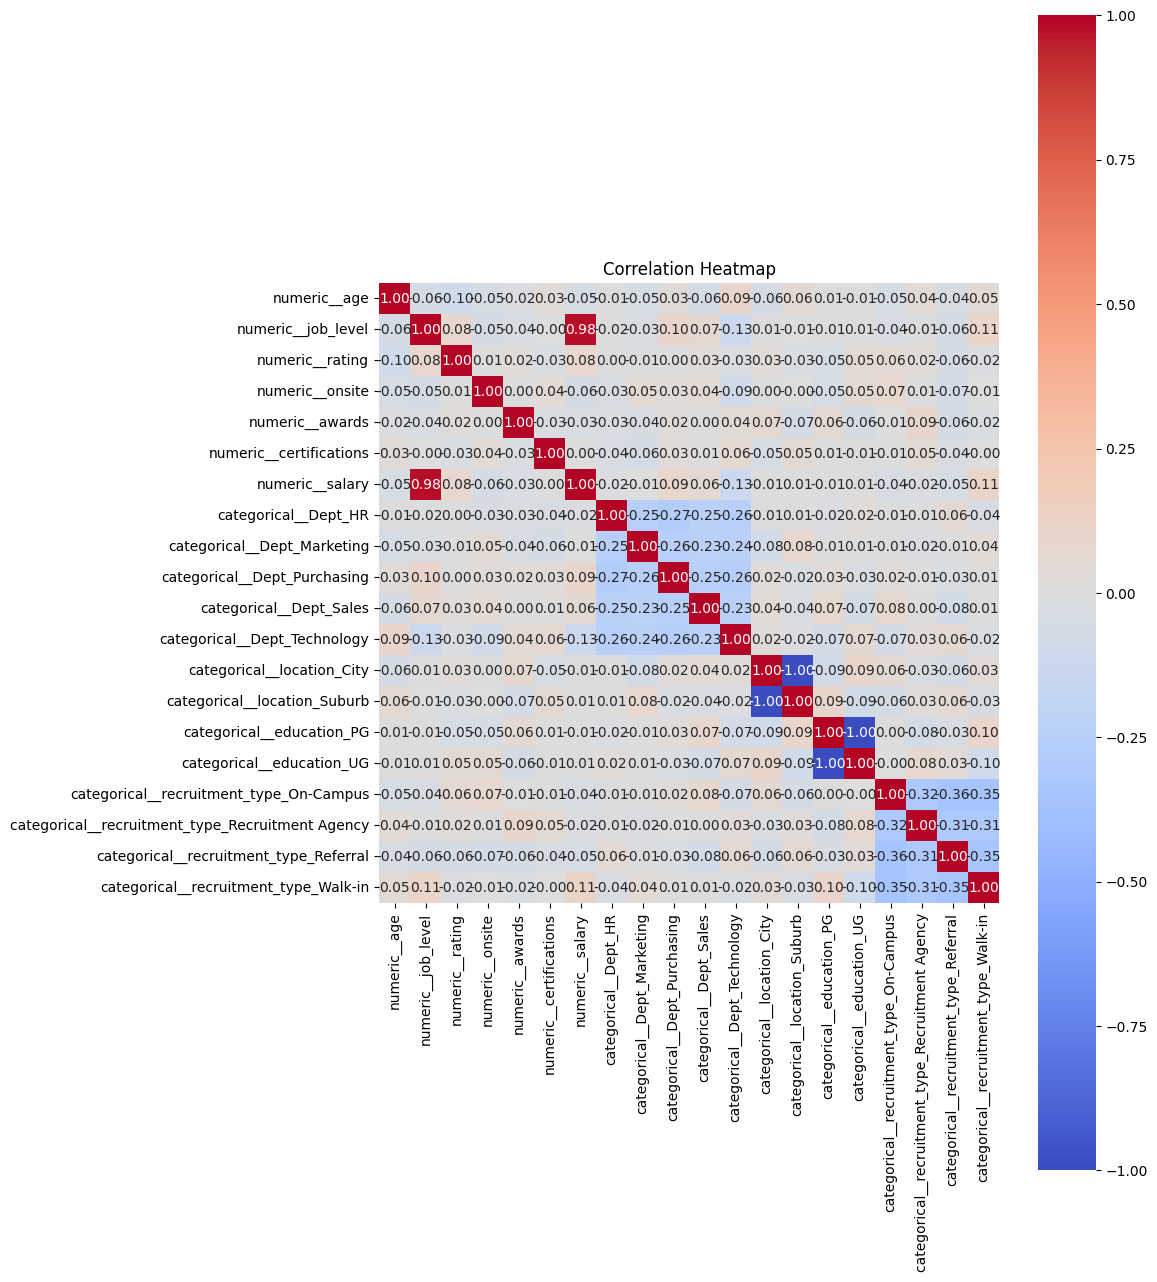

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 15))
correlation = clean_data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(clean_data, y, test_size = 0.2, stratify = y, random_state = 0)

In [ ]:
# original dataset distribution
print("Original class distribution:")
print(df['satisfied'].value_counts())

# training set distribution
print("Training set class distribution:")
print(Y_train.value_counts())

#  testing set distribution
print("Testing set class distribution:")
print(Y_test.value_counts())


Original class distribution:
satisfied
1    263
0    237
Name: count, dtype: int64
Training set class distribution:
satisfied
1    210
0    190
Name: count, dtype: int64
Testing set class distribution:
satisfied
1    53
0    47
Name: count, dtype: int64


In [ ]:
model = DT(criterion = 'entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
preds = model.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, preds))

0.5


In [ ]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0,1
Actual,,
0,23,24
1,26,27


In [ ]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}

dtree_model = DT()

dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

In [ ]:
dtree_gscv.fit(clean_data, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [ ]:
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [ ]:
DT_best = dtree_gscv.best_estimator_

In [ ]:
DT_best

DecisionTreeClassifier(max_depth=14)

In [ ]:
preds1 = DT_best.predict(X_test)

In [ ]:
pd.crosstab(Y_test, preds1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0,1
Actual,,
0,47,0
1,0,53


In [ ]:
print(accuracy_score(Y_test, preds1))

1.0


In [ ]:
predictors = list(clean_data.columns)
type(predictors)

list

In [ ]:
dot_data = tree.export_graphviz(DT_best, filled = True,
                                rounded = True,
                                feature_names = predictors,
                                class_names = ['Satisfied', "Not Satisfied"],
                                out_file = None)

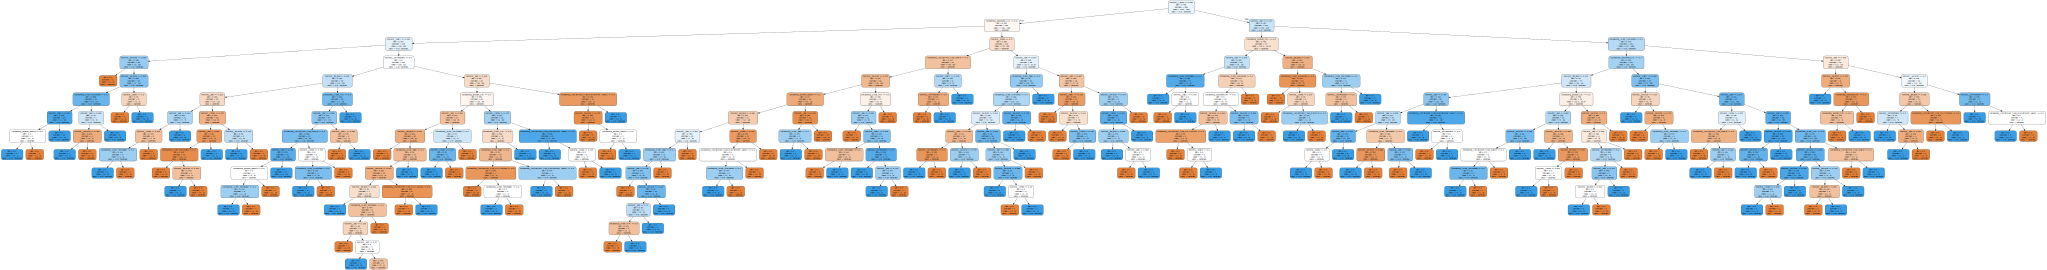

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
preds_train = DT_best.predict(X_train)

In [ ]:
pd.crosstab(Y_train, preds_train, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,0,1
Actual,,
0,190,0
1,1,209


In [ ]:
print(accuracy_score(Y_train, preds_train))

0.9975


In [ ]:
pickle.dump(DT_best, open('DT.pkl', 'wb'))

In [ ]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(Y_train)

label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))

print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{0: 0, 1: 1}
Label Encoded Target Variable
[0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_result = cross_validation(DT_best, X_train, encoded_y, 5)

In [ ]:
decision_tree_result

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,1.00000,99.875,1.0,1.0,1.000000,0.997619,1.000000,0.998802,0.4375,47.0,0.459459,0.494456,0.404762,0.471429,0.430380,0.482167
1,1.00000,99.875,1.0,1.0,1.000000,0.997619,1.000000,0.998802,0.4750,47.0,0.500000,0.494456,0.523810,0.471429,0.511628,0.482167
2,1.00000,99.875,1.0,1.0,1.000000,0.997619,1.000000,0.998802,0.4750,47.0,0.500000,0.494456,0.500000,0.471429,0.500000,0.482167
3,1.00000,99.875,1.0,1.0,1.000000,0.997619,1.000000,0.998802,0.4875,47.0,0.512821,0.494456,0.476190,0.471429,0.493827,0.482167
4,0.99375,99.875,1.0,1.0,0.988095,0.997619,0.994012,0.998802,0.4750,47.0,0.500000,0.494456,0.452381,0.471429,0.475000,0.482167


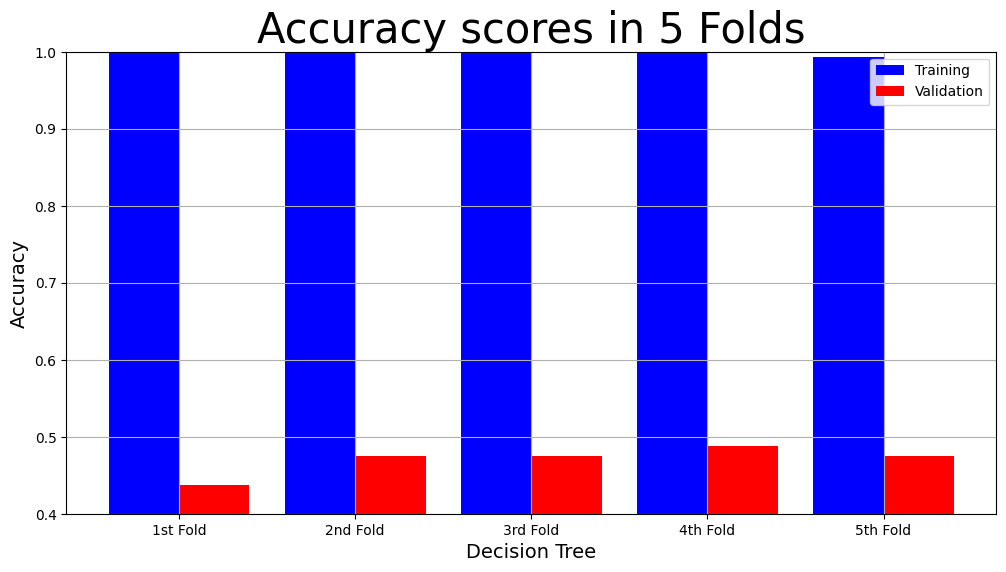

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

Fitting 5 folds for each of 1632 candidates, totalling 8160 fits
Best parameters with SMOTE: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
SMOTE Decision Tree Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.66      0.57        47
           1       0.58      0.42      0.48        53

    accuracy                           0.53       100
   macro avg       0.54      0.54      0.53       100
weighted avg       0.54      0.53      0.52       100



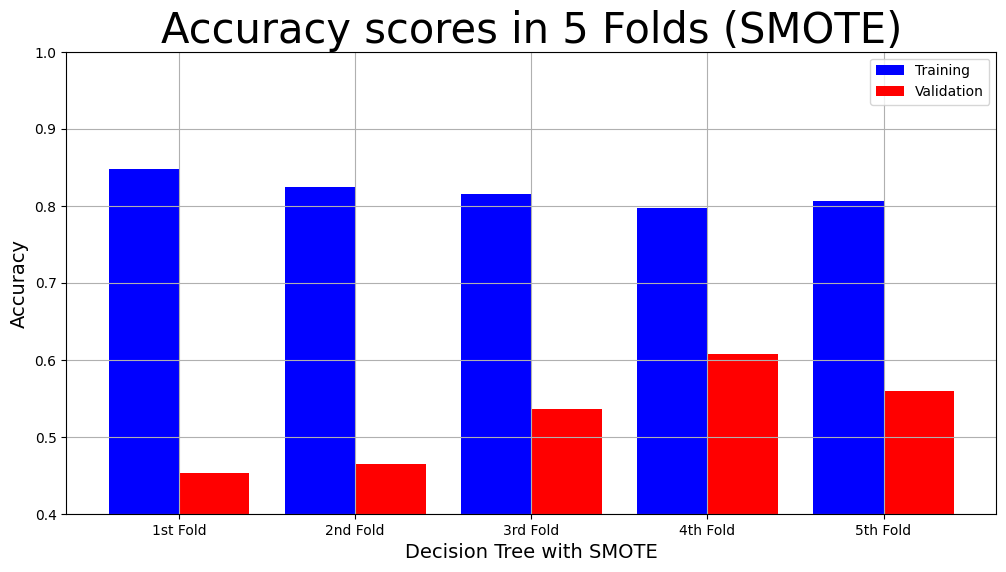

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

param_grid_smote = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 20),
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

dtree_model_smote = DT()

dtree_gscv_smote = GridSearchCV(dtree_model_smote, param_grid_smote, cv=5, scoring='balanced_accuracy', verbose=1)

dtree_gscv_smote.fit(X_resampled, y_resampled)

DT_best_smote = dtree_gscv_smote.best_estimator_
print("Best parameters with SMOTE:", dtree_gscv_smote.best_params_)

preds_smote = DT_best_smote.predict(X_test)

print("SMOTE Decision Tree Accuracy:", accuracy_score(Y_test, preds_smote))
print("Classification Report:\n", classification_report(Y_test, preds_smote))

decision_tree_result_smote = cross_validation(DT_best_smote, X_resampled, y_resampled, 5)

plot_result("Decision Tree with SMOTE",
            "Accuracy",
            "Accuracy scores in 5 Folds (SMOTE)",
            decision_tree_result_smote["Training Accuracy scores"],
            decision_tree_result_smote["Validation Accuracy scores"])
